# Train a 5 hidden layer CNN to classify MNIST
### -- Note that the CNN architecture is taken from an example on the Keras Team's github repository

In [1]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


import numpy as np
import matplotlib
import matplotlib.pyplot as plt


D:\Everything\Programs\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Setup the training and test data set for the cases
Standard CIFAR-10 test and training sets with pixel channel values converted to float32 values and scaled to the interval [0,1]



x_train shape: (60000, 28, 28, 1)
Training sample size:  60000
Testing sample size:  10000


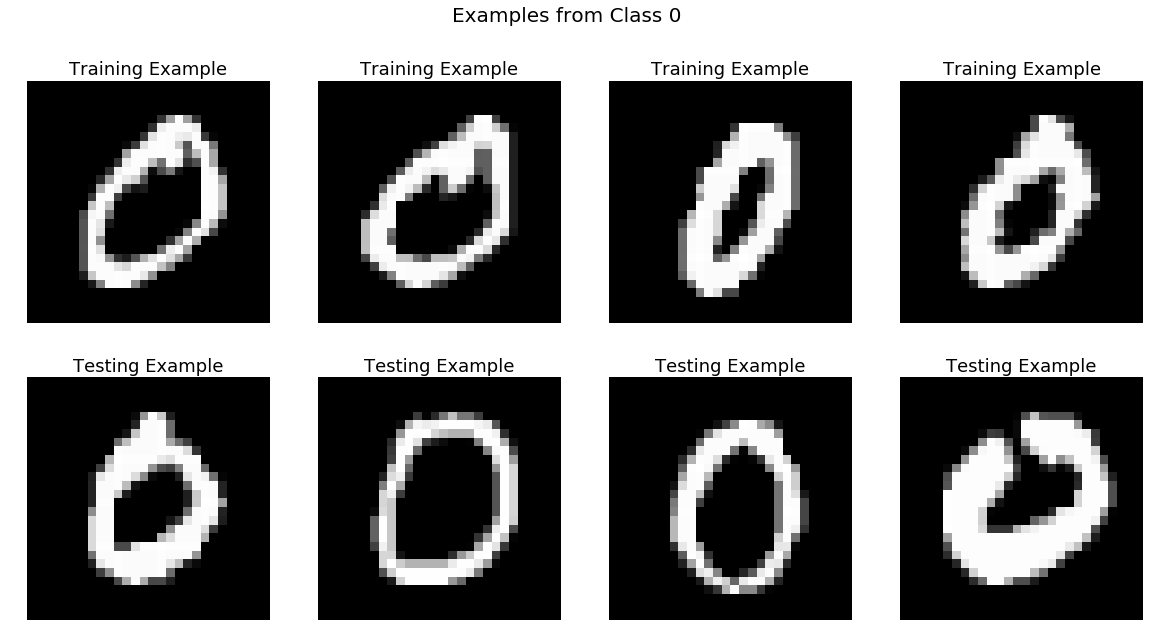

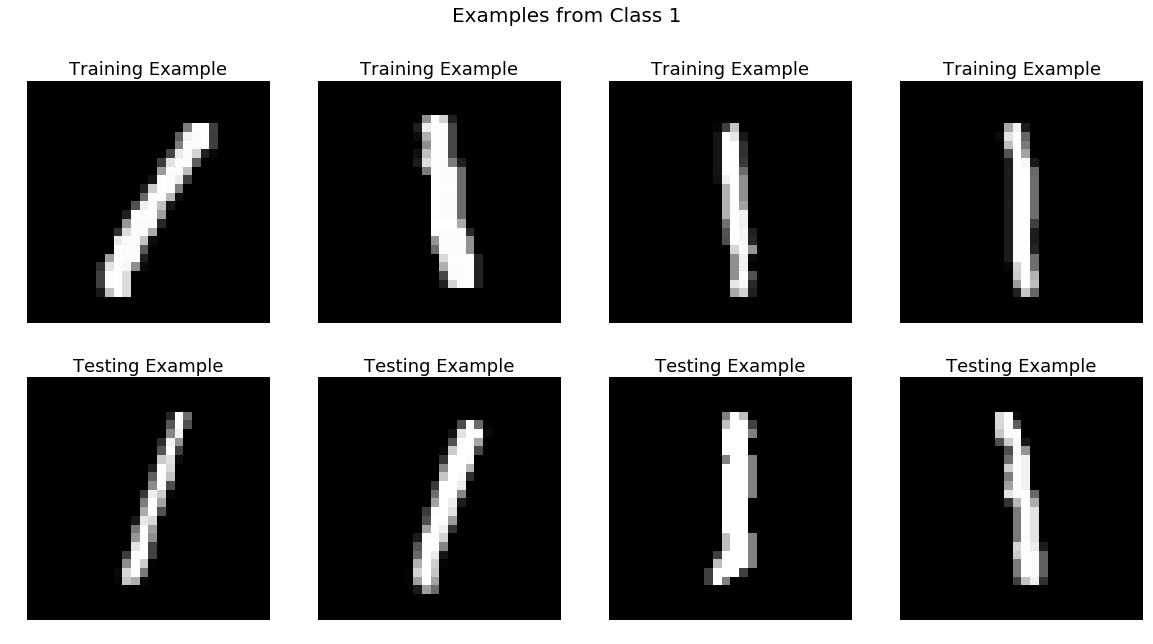

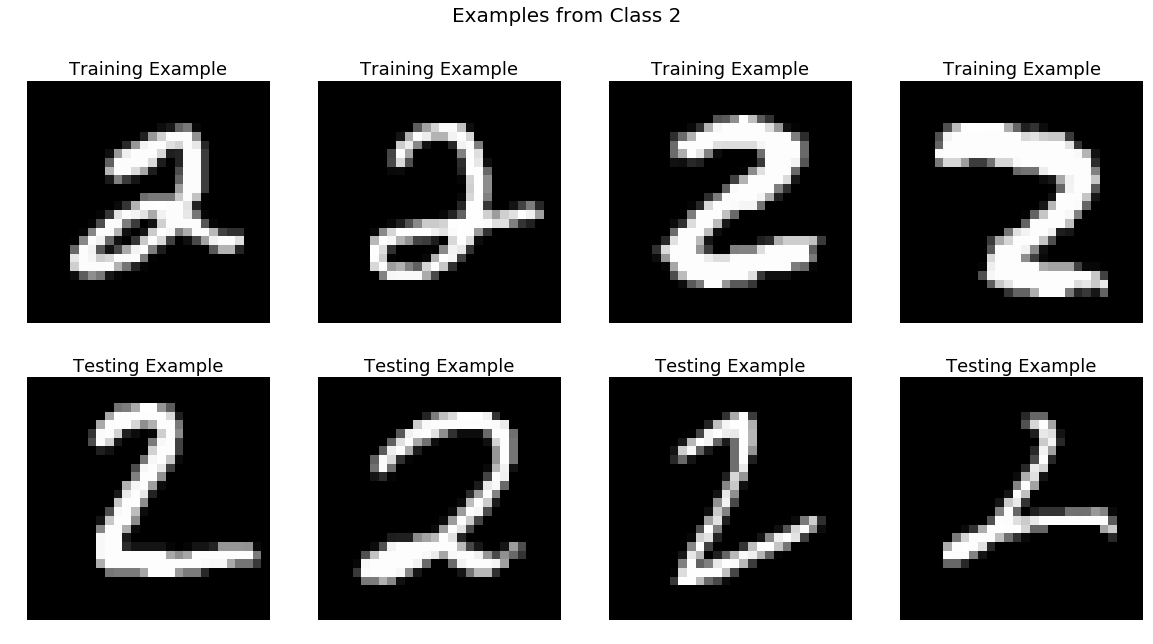

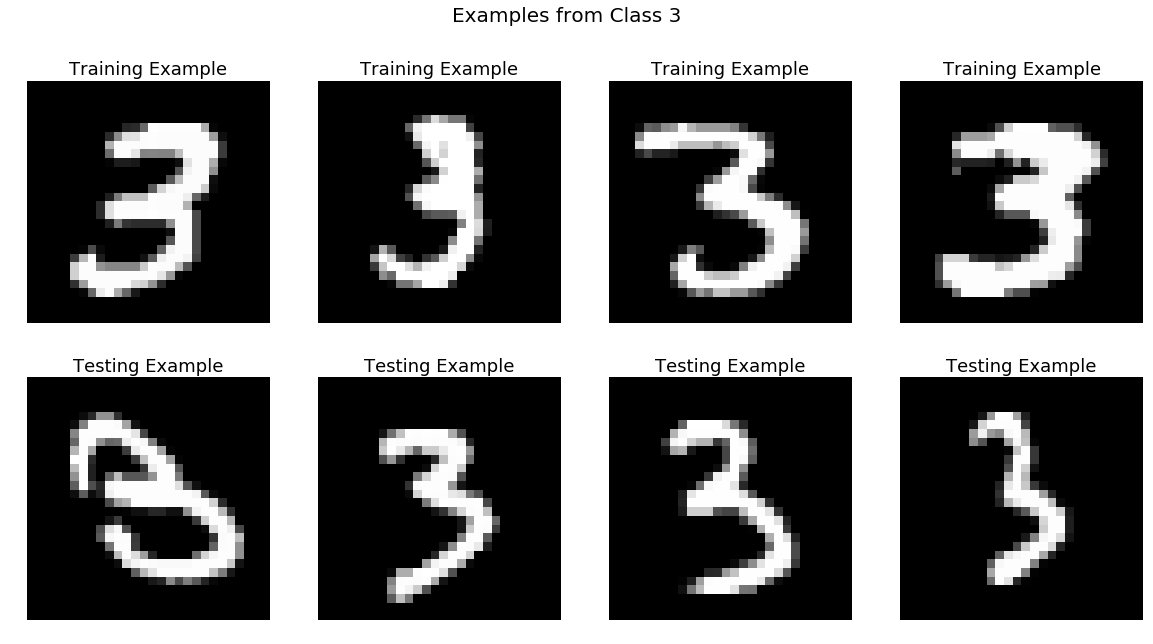

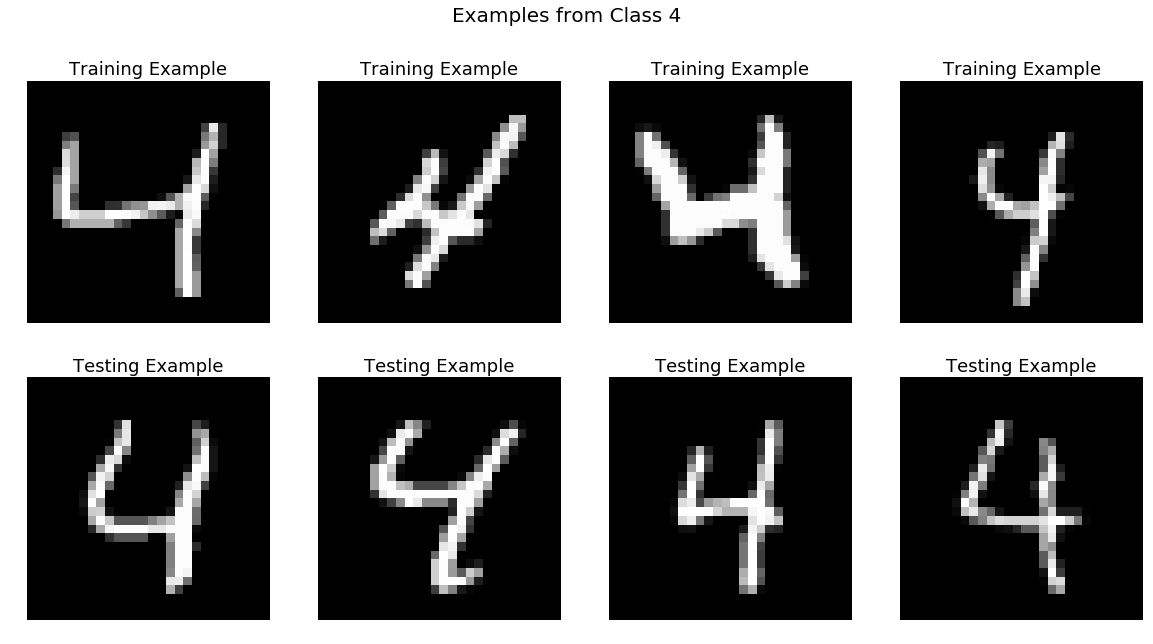

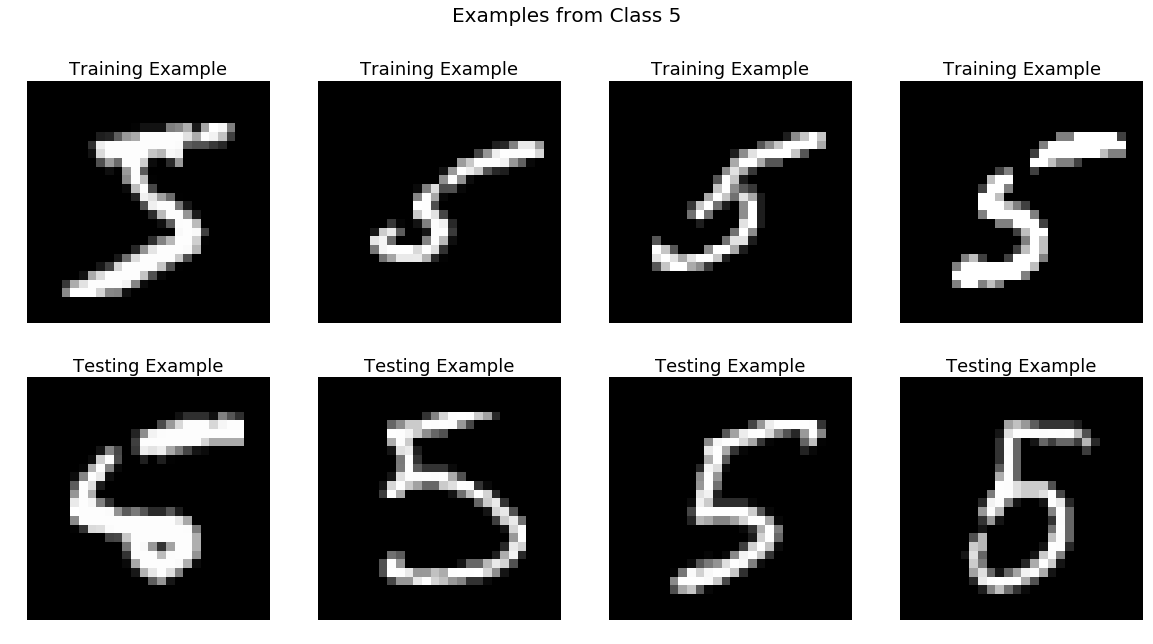

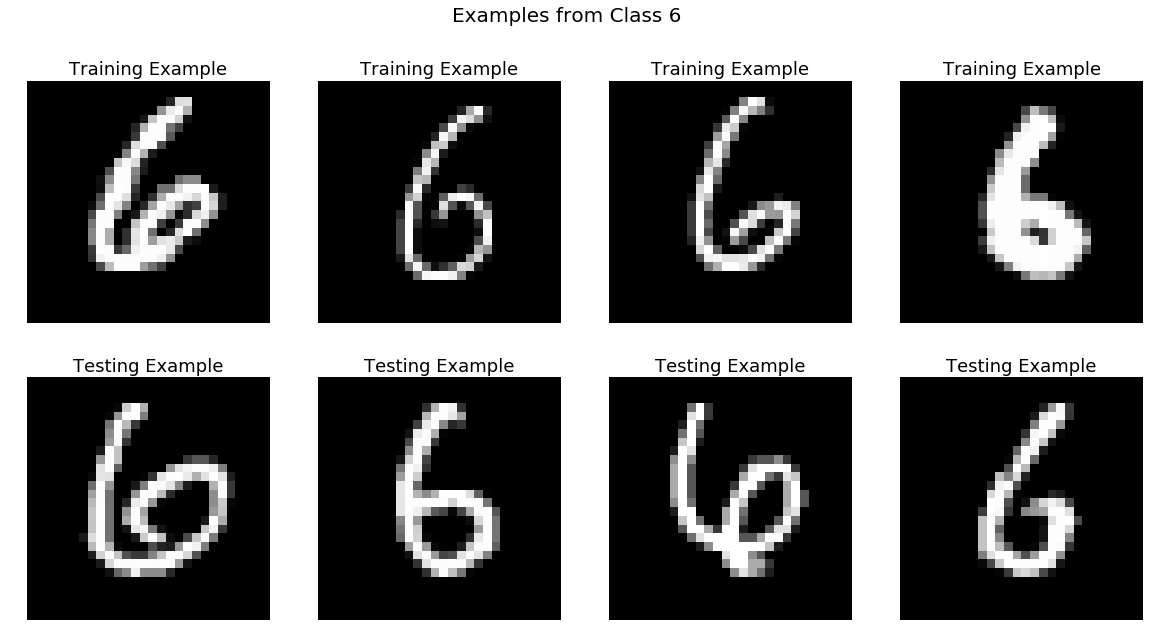

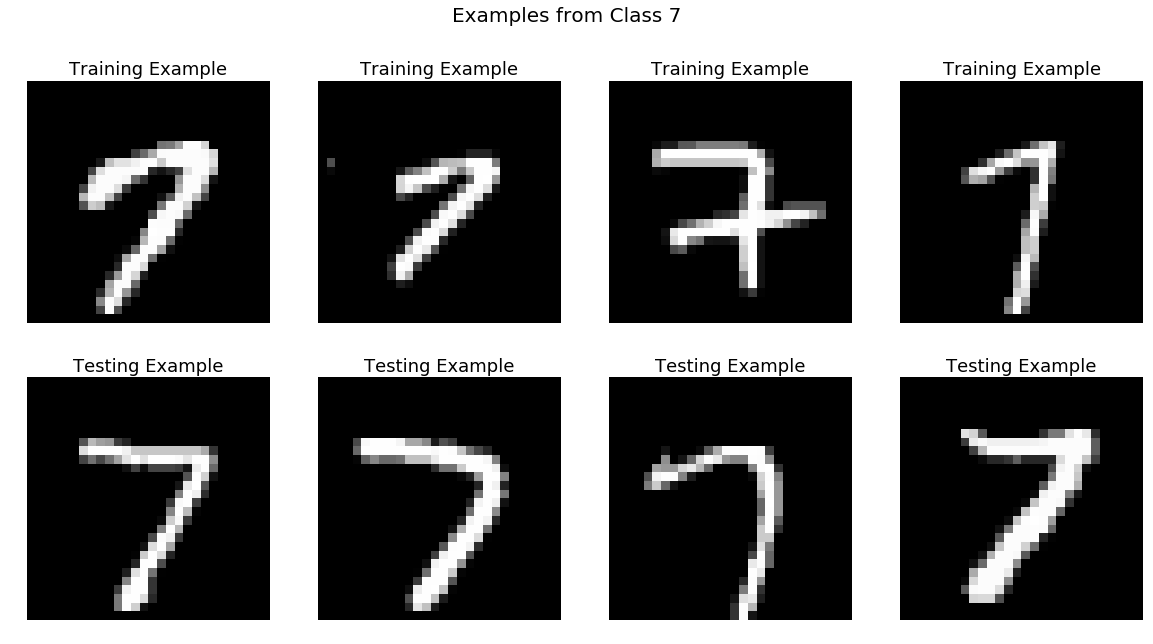

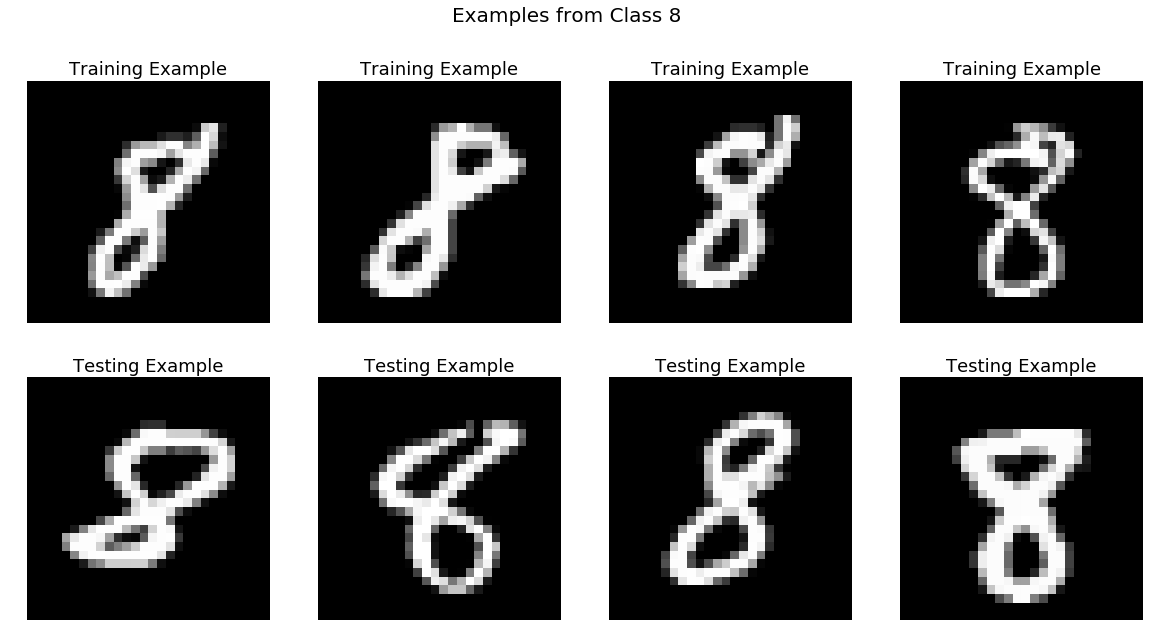

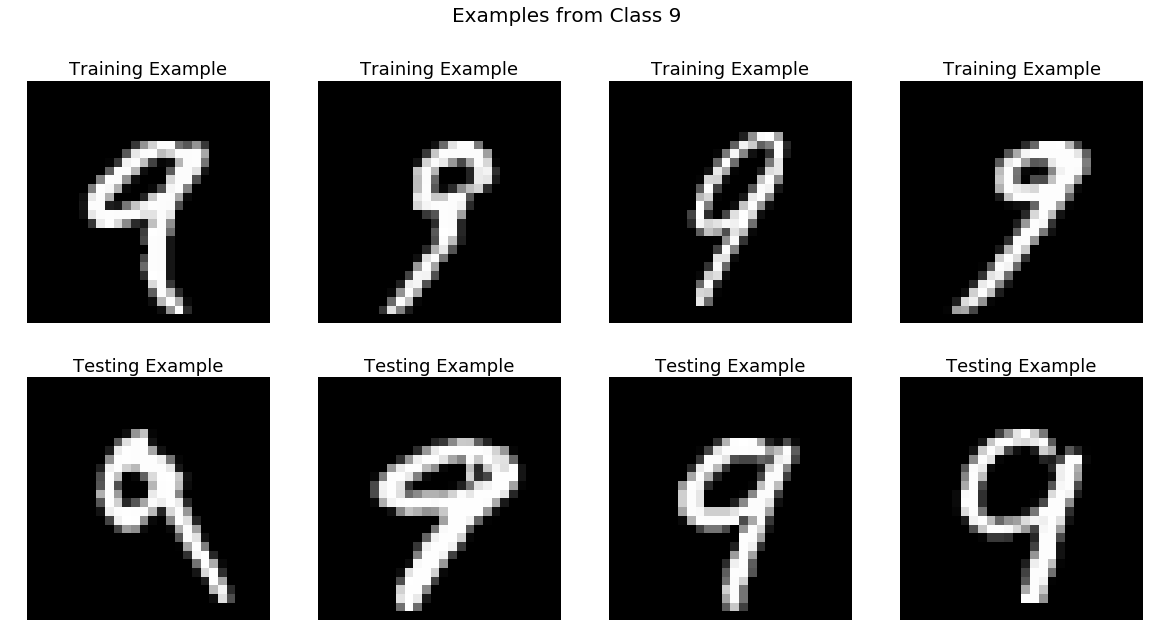

In [2]:
### Setup the training and test data sets.

num_classes, img_rows, img_cols = 10, 28, 28

# The data, shuffled and split between train and test sets:
(x_train, y_trainLabels), (x_test, y_testLabels) = mnist.load_data()

# Reshape the images, as necessary
if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
        print('channels_first')
else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)


# Convert class labels to binary (1-hot) 10-tuples.
y_train = keras.utils.to_categorical(y_trainLabels,  num_classes)
y_test  = keras.utils.to_categorical(y_testLabels,   num_classes)
y_trainLabels=y_trainLabels.flatten(); y_testLabels=y_testLabels.flatten();

print('x_train shape:', x_train.shape)
print('Training sample size: ', x_train.shape[0])
print('Testing sample size: ',  x_test.shape[0])
numOfRows = x_train.shape[1]; numOfCols = x_train.shape[2];
numOfCh = x_train.shape[3];

# Show a few example images from each class
for ii in range(num_classes):
    plt.figure(figsize=[20,10]); 
    plt.suptitle('Examples from Class '+str(ii), fontsize=20)
    indexTrainArray = np.where(y_trainLabels == ii)[0]
    indexTestArray  = np.where(y_testLabels == ii)[0]
    for jj in range(4):
        plt.subplot(2,4,jj+1); 
        anImage = x_train[indexTrainArray[jj],:,:,0]
        plt.imshow(anImage, cmap='gray'); plt.axis('off')
        plt.title('Training Example', fontsize=18)
        anImage = x_test[indexTestArray[jj],:,:,0]
        plt.subplot(2,4,jj+5); 
        plt.imshow(anImage, cmap='gray'); plt.axis('off')
        plt.title('Testing Example', fontsize=18)
    plt.show()


# Scale the pixel values in the images
x_train = x_train.astype('float32'); x_test = x_test.astype('float32')
x_train /= 255; x_test /= 255



In [3]:
# Set the number of epochs to train and the minibatch size
batch_size = 32
epochs = 3

## Train a network for the CIFAR10 data set

In [4]:
# Create a model object for a simple CNN without regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

cifarHistoryObj = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 506s 8ms/step - loss: 0.1988 - acc: 0.9414 - val_loss: 0.0543 - val_acc: 0.9818
Epoch 2/3
60000/60000 [==============================] - 457s 8ms/step - loss: 0.0547 - acc: 0.9830 - val_loss: 0.0490 - val_acc: 0.9852
Epoch 3/3
60000/60000 [==============================] - 476s 8ms/step - loss: 0.0395 - acc: 0.9880 - val_loss: 0.0293 - val_acc: 0.9903


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 13, 13, 64)        0         
__________

In [6]:
# Run network to generate predictions on a few images from the test set
numInPredSubset=15
predictionArray = model.predict(x_test[0:numInPredSubset, :,:,:])

# Find the output class with the peak value
predictedClassArray = np.argmax(predictionArray, axis=1).flatten()

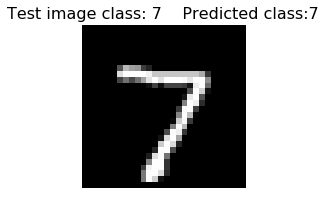

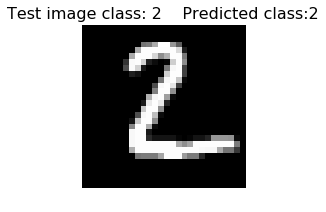

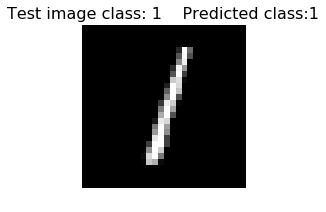

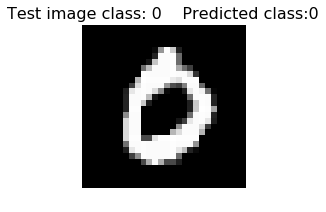

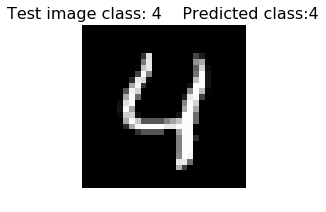

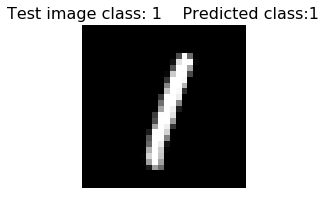

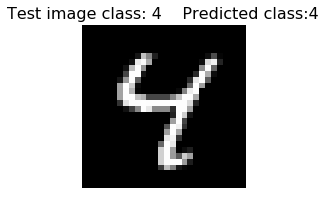

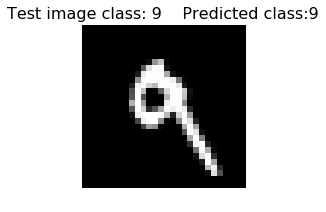

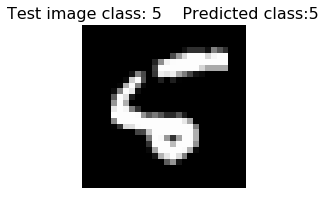

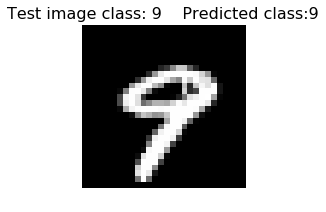

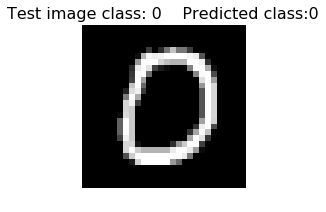

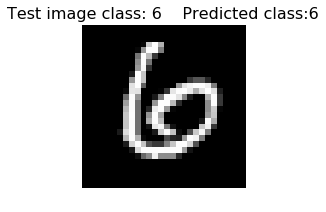

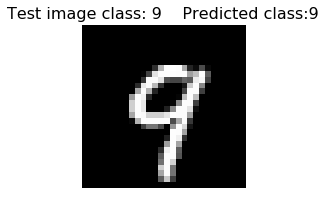

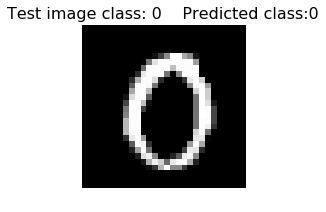

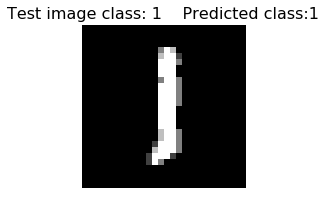

In [7]:
# Show images, their true class, and their preditions
for ii in range(numInPredSubset):
    plt.figure(figsize=[3,3]) 
    anImage = x_test[ii,:,:,0]; 
    plt.imshow(anImage, cmap='gray'); plt.axis('off')
    plt.title('Test image class: ' + str(y_testLabels[ii]) + '    Predicted class:' + \
              str(predictedClassArray[ii]), fontsize=16)


In [8]:
# Score trained model against the training and test sets (i.e. generate predictions and calculate the accuracy)
trainScores = model.evaluate(x_train, y_train, verbose=1)
print('Training loss:', trainScores[0]); print('Training set accuracy:', trainScores[1])

testScores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', testScores[0]); print('Testing set accuracy:', testScores[1])



60000/60000 [==============================] - 145s 2ms/step
Training loss: 0.025997984243721777
Training set accuracy: 0.9919
10000/10000 [==============================] - 24s 2ms/step
Test loss: 0.029264677106789896
Testing set accuracy: 0.9903
